In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_path = '제주20년1월부터12월이상치+주소정리.xlsx'
jeju = pd.read_excel(file_path)
jeju = jeju.drop('Unnamed: 0', axis=1)
jeju

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,제주,제주직할,아이린4차 아파트,완속01,3558,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,12.30,1,57,2020-01-01,2020-01-01 20:34:00,2020-01-01 22:31:00,제주특별자치도,제주시,이도일동 동광로 35
1,제주,제주직할,아라원신 아파트,급속01,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,50.37,1,34,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:54:00,제주특별자치도,제주시,아라일동 중앙로 578
2,제주,제주직할,방선문5차빌리지,완속01,3529,제주특별자치도 제주시 아라일동 아란1길 30,완속,7.0,14.36,2,13,2020-01-01,2020-01-01 20:51:00,2020-01-01 23:05:00,제주특별자치도,제주시,아라일동 아란1길 30
3,제주,제주직할,종합경기장,급속01,628,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,11.03,0,24,2020-01-01,2020-01-01 21:40:00,2020-01-01 22:05:00,제주특별자치도,제주시,서광로2길 24 (오라일동)
4,제주,제주직할,노형2차부영 아파트,완속02,3516,제주특별자치도 제주시 노형동 754-4,완속,7.0,9.44,1,48,2020-01-01,2020-01-01 21:41:00,2020-01-01 23:30:00,제주특별자치도,제주시,노형동 754-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248023,제주,제주직할,부웅크리스탈빌1차,완속1,6137,제주특별자치도 제주시 도남동 원남6길 55-1,완속,7.0,22.00,3,58,2020-12-03,2020-12-02 22:01,2020-12-03 1:59,제주특별자치도,제주시,도남동 원남6길 55-1
248024,제주,제주직할,아이린아파트,완속01,6658,제주특별자치도 제주시 서사로7길 1,완속,7.0,32.70,5,4,2020-12-03,2020-12-02 19:08,2020-12-03 0:13,제주특별자치도,제주시,서사로7길 1
248025,제주,서귀포,서귀포혁신LH1단지,완속01,5243,제주특별자치도 서귀포시 서호동 서호남로 92-15,완속,7.0,24.10,4,8,2020-12-03,2020-12-02 23:12,2020-12-03 3:20,제주특별자치도,서귀포시,서호동 서호남로 92-15
248026,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,33.27,4,59,2020-12-03,2020-12-02 19:30,2020-12-03 0:30,제주특별자치도,제주시,노형동 광평동로 66


In [4]:
file1_path = '2021_11_30기준 전국전기차충전소정보.xlsx'
station = pd.read_excel(file1_path)
station

,stat_nm,stat_id,chger_id,chger_type,addr,lat,lon,use_time,busi_id,busi_nm,...,chger_stat,stat_upd_dt,power_type,city_do_cd,parking_free_yn,stat_note,limit_yn,limit_detail,del_yn,del_detail
0,종묘 공영주차장,ME000001,1,3,서울특별시 종로구 종로 157,37.571076,126.995880,24시간 이용가능,ME,환경부,...,9,2.021111e+13,NaN,11,Y,NaN,N,NaN,N,NaN
1,세종로 공영주차장,ME000002,1,6,서울특별시 종로구 세종대로 189,37.573611,126.976011,24시간 이용가능,ME,환경부,...,9,2.021083e+13,NaN,11,Y,NaN,N,NaN,N,NaN
2,그랜드앰배서더 서울,ME000003,1,6,서울특별시 중구 동호로 287,37.559352,127.002350,24시간 이용가능,ME,환경부,...,9,2.021091e+13,NaN,11,N,NaN,N,NaN,N,NaN
3,한강진역 공영주차장,ME000004,1,3,서울특별시 용산구 한남동 산10-84,37.540085,127.002804,24시간 이용가능,ME,환경부,...,9,2.021091e+13,NaN,11,Y,NaN,N,NaN,N,NaN
4,기아차 성동서비스센터,ME000005,1,3,서울특별시 성동구 성수이로26길 61,37.544834,127.064226,24시간 이용가능,ME,환경부,...,9,2.021072e+13,NaN,11,N,20190626 공사로 인한 임시철거,Y,20190626 공사로 인한 임시철거,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89231,영남알프스복합웰컴센터,US200419,2,4,울산광역시 울주군 상북면 등억알프스리 517,35.556117,129.068415,24시간 이용가능,US,환경부,...,9,2.021113e+13,NaN,31,Y,NaN,N,NaN,N,NaN
89232,언양읍 행정복지센터,US200420,1,4,울산광역시 울주군 언양읍 동문길 7,35.569414,129.125781,24시간 이용가능,US,환경부,...,3,2.021113e+13,NaN,31,Y,NaN,N,NaN,N,NaN
89233,화봉공원 공영주차장,US200421,1,4,울산광역시 북구 화봉동 445-1,35.588995,129.364458,24시간 이용가능,US,환경부,...,3,2.021113e+13,NaN,31,Y,NaN,N,NaN,N,NaN
89234,화봉공원 공영주차장,US200421,2,4,울산광역시 북구 화봉동 445-1,35.588995,129.364458,24시간 이용가능,US,환경부,...,3,2.021113e+13,NaN,31,Y,NaN,N,NaN,N,NaN


In [5]:
jeju_stat_names = jeju['충전소명'].unique()

# station 파일에서 ele_stat_names와 일치하는 stat_nm을 가진 데이터를 추출
#.isin 함수를 이용해 ele_stat_names 값만 가지고와서 station 의 stat_nm 값과 비교해서
#맞는 값을 station_data 저장
station_data = station[station['stat_nm'].isin(jeju_stat_names)]

In [6]:
station_data

,stat_nm,stat_id,chger_id,chger_type,addr,lat,lon,use_time,busi_id,busi_nm,...,chger_stat,stat_upd_dt,power_type,city_do_cd,parking_free_yn,stat_note,limit_yn,limit_detail,del_yn,del_detail
298,제주도청 1청사,ME000437,1,6,제주특별자치도 제주시 문연로 6 제주특별자치도청,33.489471,126.498023,24시간 이용가능,ME,환경부,...,9,2.021092e+13,NaN,50,N,NaN,N,NaN,N,NaN
299,제주시청,ME000438,1,3,제주특별자치도 제주시 광양9길 10,33.500189,126.531570,24시간 이용가능,ME,환경부,...,9,2.021091e+13,NaN,50,N,NaN,N,NaN,N,NaN
300,제주도청 제2청사,ME000439,1,3,제주특별자치도 제주시 문연로 30,33.489399,126.500838,24시간 이용가능,ME,환경부,...,9,2.021091e+13,NaN,50,N,NaN,N,NaN,N,NaN
303,산굼부리,ME000446,1,3,제주특별자치도 제주시 조천읍 비자림로 768,33.434940,126.689497,24시간 이용가능,ME,환경부,...,9,2.021112e+13,NaN,50,N,NaN,N,NaN,N,NaN
304,한경면체육관,ME000447,1,3,제주특별자치도 제주시 한경면 칠전로 41,33.301417,126.184560,24시간 이용가능,ME,환경부,...,9,2.021112e+13,NaN,50,N,NaN,N,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88607,문화아파트,TDH00033,1,2,경기도 평택시 중앙로 301,36.991813,127.115367,24시간 이용가능,TD,타디스테크놀로지(evPlug),...,2,2.021113e+13,NaN,41,Y,NaN,N,NaN,N,NaN
88608,문화아파트,TDH00033,2,2,경기도 평택시 중앙로 301,36.991813,127.115367,24시간 이용가능,TD,타디스테크놀로지(evPlug),...,2,2.021113e+13,NaN,41,Y,NaN,N,NaN,N,NaN
88609,문화아파트,TDH00033,3,2,경기도 평택시 중앙로 301,36.991813,127.115367,24시간 이용가능,TD,타디스테크놀로지(evPlug),...,2,2.021113e+13,NaN,41,Y,NaN,N,NaN,N,NaN
88610,문화아파트,TDH00033,4,2,경기도 평택시 중앙로 301,36.991813,127.115367,24시간 이용가능,TD,타디스테크놀로지(evPlug),...,2,2.021113e+13,NaN,41,Y,NaN,N,NaN,N,NaN


In [26]:
# station_data에서 lat, lon 컬럼만 선택
station_latlon = station_data[['stat_nm', 'lat', 'lon']]

# ele 파일과 stat_nm 컬럼을 이용해 merge
jeju_coords = pd.merge(jeju, station_latlon, left_on='충전소명', right_on='stat_nm', how='left')

In [27]:
jeju_coords

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,stat_nm,lat,lon
0,제주,제주직할,아이린4차 아파트,완속01,3558,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,12.30,1,57,2020-01-01,2020-01-01 20:34:00,2020-01-01 22:31:00,제주특별자치도,제주시,이도일동 동광로 35,아이린4차 아파트,33.502742,126.532630
1,제주,제주직할,아이린4차 아파트,완속01,3558,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,12.30,1,57,2020-01-01,2020-01-01 20:34:00,2020-01-01 22:31:00,제주특별자치도,제주시,이도일동 동광로 35,아이린4차 아파트,33.502742,126.532630
2,제주,제주직할,아라원신 아파트,급속01,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,50.37,1,34,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:54:00,제주특별자치도,제주시,아라일동 중앙로 578,아라원신 아파트,33.471529,126.544137
3,제주,제주직할,방선문5차빌리지,완속01,3529,제주특별자치도 제주시 아라일동 아란1길 30,완속,7.0,14.36,2,13,2020-01-01,2020-01-01 20:51:00,2020-01-01 23:05:00,제주특별자치도,제주시,아라일동 아란1길 30,NaN,NaN,NaN
4,제주,제주직할,종합경기장,급속01,628,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,11.03,0,24,2020-01-01,2020-01-01 21:40:00,2020-01-01 22:05:00,제주특별자치도,제주시,서광로2길 24 (오라일동),종합경기장,33.495532,126.517324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884136,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,33.27,4,59,2020-12-03,2020-12-02 19:30,2020-12-03 0:30,제주특별자치도,제주시,노형동 광평동로 66,노형지구중흥S클래스 아파트,33.485065,126.467561
884137,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,33.27,4,59,2020-12-03,2020-12-02 19:30,2020-12-03 0:30,제주특별자치도,제주시,노형동 광평동로 66,노형지구중흥S클래스 아파트,33.485065,126.467561
884138,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,33.27,4,59,2020-12-03,2020-12-02 19:30,2020-12-03 0:30,제주특별자치도,제주시,노형동 광평동로 66,노형지구중흥S클래스 아파트,33.485065,126.467561
884139,제주,제주직할,아라뜨래별연립주택,완속01,3543,제주특별자치도 제주시 아라이동 인다1길 15,완속,7.0,36.20,6,38,2020-12-03,2020-12-02 18:05,2020-12-03 0:43,제주특별자치도,제주시,아라이동 인다1길 15,아라뜨래별연립주택,33.476618,126.551271


In [9]:
# jeju_coords.to_csv('charging_station_count_df.csv')

In [36]:
# 중복된충전소제거
jeju_coords = jeju_coords.drop_duplicates(subset='stat_nm', keep='first')

In [11]:
jejudo_fas = jeju_coords[jeju_coords['충전기구분'] =='급속']
jejudo_slo =jeju_coords[jeju_coords['충전기구분']== '완속']

In [12]:
jejudo_fast_Seogwipo = jejudo_fas[jejudo_fas['구']=='서귀포시']
jejudo_fast_jeju = jejudo_fas[jejudo_fas['구']=='제주시']

In [13]:
jejudo_slow_Seogwipo = jejudo_slo[jejudo_slo['구']=='서귀포시']
jejudo_slow_jeju = jejudo_slo[jejudo_slo['구']=='제주시']

In [14]:
jejudo_fast_Seogwipo_count=jejudo_fast_Seogwipo['충전기구분'].count()
jejudo_fast_jeju_count=jejudo_fast_jeju['충전기구분'].count()

In [15]:
jejudo_slow_Seogwipo=jejudo_slow_Seogwipo['충전기구분'].count()
jejudo_slow_jeju=jejudo_slow_jeju['충전기구분'].count()

In [16]:
jejudo_slow_jeju

73

In [32]:
jejudo_slow_Seogwipo

15

In [33]:
jejudo_fast_Seogwipo_count

99

In [34]:
jejudo_fast_jeju_count

155

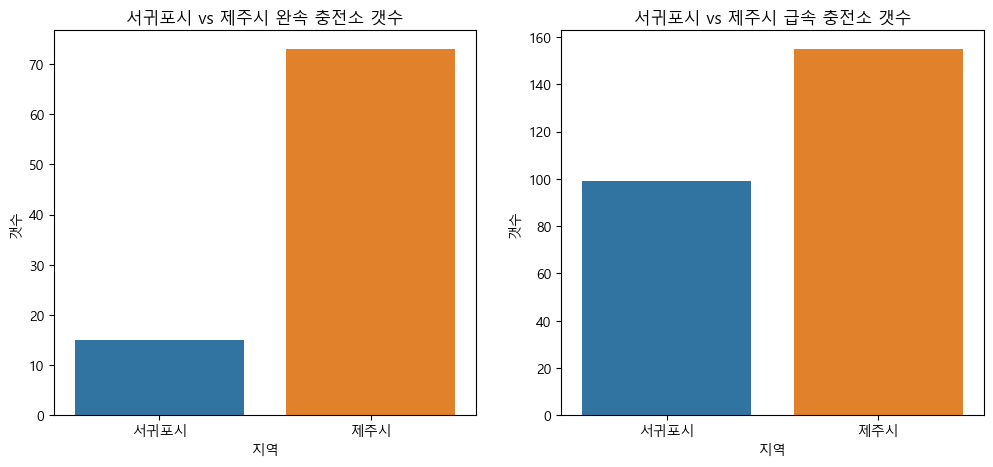

In [17]:
# 그래프 크기 설정
plt.figure(figsize=(12, 5))
plt.rcParams['font.family'] = 'Malgun Gothic'

# 완속 충전소 갯수 그래프
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
sns.barplot(x=['서귀포시', '제주시'], y=[jejudo_slow_Seogwipo, jejudo_slow_jeju])
plt.title('서귀포시 vs 제주시 완속 충전소 갯수')
plt.xlabel('지역')
plt.ylabel('갯수')

# 급속 충전소갯수 그래프
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
sns.barplot(x=['서귀포시', '제주시'], y=[jejudo_fast_Seogwipo_count, jejudo_fast_jeju_count])
plt.title('서귀포시 vs 제주시 급속 충전소 갯수')
plt.xlabel('지역')
plt.ylabel('갯수')

# 그래프 보이기
plt.show()


In [18]:
import numpy as np

In [28]:
jejudo_fas = jeju_coords[jeju_coords['충전기구분'] =='급속']['충전량'].sum()
jejudo_fas

12148315.166999994

In [29]:
jejudo_slo =jeju_coords[jeju_coords['충전기구분']== '완속']['충전량'].sum()
jejudo_slo

4168096.139195682

In [37]:
jeju_coords

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,stat_nm,lat,lon
0,제주,제주직할,아이린4차 아파트,완속01,3558,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,12.30,1,57,2020-01-01,2020-01-01 20:34:00,2020-01-01 22:31:00,제주특별자치도,제주시,이도일동 동광로 35,아이린4차 아파트,33.502742,126.532630
2,제주,제주직할,아라원신 아파트,급속01,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,50.37,1,34,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:54:00,제주특별자치도,제주시,아라일동 중앙로 578,아라원신 아파트,33.471529,126.544137
3,제주,제주직할,방선문5차빌리지,완속01,3529,제주특별자치도 제주시 아라일동 아란1길 30,완속,7.0,14.36,2,13,2020-01-01,2020-01-01 20:51:00,2020-01-01 23:05:00,제주특별자치도,제주시,아라일동 아란1길 30,NaN,NaN,NaN
4,제주,제주직할,종합경기장,급속01,628,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,11.03,0,24,2020-01-01,2020-01-01 21:40:00,2020-01-01 22:05:00,제주특별자치도,제주시,서광로2길 24 (오라일동),종합경기장,33.495532,126.517324
10,제주,제주직할,노형2차부영 아파트,완속02,3516,제주특별자치도 제주시 노형동 754-4,완속,7.0,9.44,1,48,2020-01-01,2020-01-01 21:41:00,2020-01-01 23:30:00,제주특별자치도,제주시,노형동 754-4,노형2차부영 아파트,33.476997,126.484587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826756,환경부,환경부,용담1동주민센터,급속01,11004546,제주특별자치도 제주시 용남3길 7,급속,NaN,6.30,0,26,2020-11-13,2020-11-13 16:32,2020-11-13 16:58,제주특별자치도,제주시,용남3길 7,용담1동주민센터,33.509217,126.513524
837033,환경부,환경부,동녘도서관,급속02,11005055,제주특별자치도 제주시 구좌읍 일주동로 3132,급속,NaN,43.10,0,40,2020-11-17,2020-11-17 19:07,2020-11-17 19:47,제주특별자치도,제주시,구좌읍 일주동로 3132,동녘도서관,33.520768,126.854705
852064,환경부,환경부,제주특별자치도의회,급속01,11004632,제주특별자치도 제주시 문연로 13,급속,NaN,39.12,0,40,2020-11-22,2020-11-22 9:31,2020-11-22 10:11,제주특별자치도,제주시,문연로 13,제주특별자치도의회,33.489975,126.499794
868278,환경부,환경부,김녕119지역센터,급속01,11005049,제주특별자치도 제주시 구좌읍 김녕로 242,급속,NaN,21.76,0,35,2020-11-28,2020-11-28 18:08,2020-11-28 18:44,제주특별자치도,제주시,구좌읍 김녕로 242,김녕119지역센터,33.554272,126.762930


In [49]:
jeju_coords[jeju_coords['충전소명'].str.contains('서귀포자연휴양림')]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,stat_nm,lat,lon


In [21]:
jeju_fast = jeju_coords[jeju_coords['충전기구분'] == '급속']
jeju_fast1 =jeju_fast.drop_duplicates(subset='충전소명', keep='first')
jeju_slow = jeju_coords[jeju_coords['충전기구분'] == '완속']
jeju_slow1 =jeju_slow.drop_duplicates(subset='충전소명', keep='first')

In [22]:
jeju_coords[jeju_coords['충전기구분']== '급속']

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,stat_nm,lat,lon
2,제주,제주직할,아라원신 아파트,급속01,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,50.37,1,34,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:54:00,제주특별자치도,제주시,아라일동 중앙로 578,아라원신 아파트,33.471529,126.544137
4,제주,제주직할,종합경기장,급속01,628,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,11.03,0,24,2020-01-01,2020-01-01 21:40:00,2020-01-01 22:05:00,제주특별자치도,제주시,서광로2길 24 (오라일동),종합경기장,33.495532,126.517324
17,제주,제주직할,제주직할,급속01,513,제주특별자치도 제주시 문연로 36,급속,50.0,19.51,0,41,2020-01-01,2020-01-01 21:58:00,2020-01-01 22:39:00,제주특별자치도,제주시,문연로 36,제주직할,33.489290,126.501216
47,제주,서귀포,대천동주민센터,급속01,1473,제주특별자치도 서귀포시 도순로 44,급속,50.0,13.46,0,19,2020-01-01,2020-01-01 23:38:00,2020-01-01 23:58:00,제주특별자치도,서귀포시,도순로 44,대천동주민센터,33.250852,126.477748
49,제주,제주직할,유수암,급속01,1451,"제주특별자치도 제주시 애월읍 유수암평화길 227 (유수암리, 해모루)",급속,50.0,23.54,1,7,2020-01-01,2020-01-01 21:21:00,2020-01-01 22:28:00,제주특별자치도,제주시,"애월읍 유수암평화길 227 (유수암리, 해모루)",유수암,33.423829,126.407974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826756,환경부,환경부,용담1동주민센터,급속01,11004546,제주특별자치도 제주시 용남3길 7,급속,NaN,6.30,0,26,2020-11-13,2020-11-13 16:32,2020-11-13 16:58,제주특별자치도,제주시,용남3길 7,용담1동주민센터,33.509217,126.513524
837033,환경부,환경부,동녘도서관,급속02,11005055,제주특별자치도 제주시 구좌읍 일주동로 3132,급속,NaN,43.10,0,40,2020-11-17,2020-11-17 19:07,2020-11-17 19:47,제주특별자치도,제주시,구좌읍 일주동로 3132,동녘도서관,33.520768,126.854705
852064,환경부,환경부,제주특별자치도의회,급속01,11004632,제주특별자치도 제주시 문연로 13,급속,NaN,39.12,0,40,2020-11-22,2020-11-22 9:31,2020-11-22 10:11,제주특별자치도,제주시,문연로 13,제주특별자치도의회,33.489975,126.499794
868278,환경부,환경부,김녕119지역센터,급속01,11005049,제주특별자치도 제주시 구좌읍 김녕로 242,급속,NaN,21.76,0,35,2020-11-28,2020-11-28 18:08,2020-11-28 18:44,제주특별자치도,제주시,구좌읍 김녕로 242,김녕119지역센터,33.554272,126.762930


In [23]:
jeju_fast1=jeju_fast1.dropna()
jeju_slow1=jeju_slow1.dropna()

In [24]:
# 서울 중심의 지도 생성
seoul_location = [33.3846, 126.5535]
map = folium.Map(location=seoul_location, zoom_start=11)

# 완속 충전소 표시 (빨간색)
for i, row in jeju_slow1.iterrows():
    tooltip_text = f"{row['충전소명']},(완속)"
    icon_color = 'red'
    icon = folium.Icon(color=icon_color)
    folium.Marker(location=[row['lat'], row['lon']], 
                  tooltip=tooltip_text, icon=icon).add_to(map)

# 급속 충전소 표시 (파란색)
for i, row in jeju_fast1.iterrows():
    # 같은 충전소명이 있는 경우 툴팁에 표시하기 위해 ele_slow1에서도 해당 데이터 추출
    same_name_slow = jeju_slow1[jeju_slow1['충전소명'] == row['충전소명']]
    if not same_name_slow.empty:
        # 같은 충전소명이 있는 경우 -> 빨간색, 파란색 마크를 함께 표시
        tooltip_text = f"{row['충전소명']},(완속,급속)"
        icon_color = 'purple'
        icon = folium.Icon(color=icon_color)
        folium.Marker(location=[row['lat'], row['lon']], 
                      tooltip=tooltip_text, icon=icon).add_to(map)
    else:
        # 같은 충전소명이 없는 경우 -> 파란색 마크만 표시
        tooltip_text = f"{row['충전소명']}, (급속)"
        icon_color = 'blue'
        icon = folium.Icon(color=icon_color)
        folium.Marker(location=[row['lat'], row['lon']], 
                      tooltip=tooltip_text, icon=icon).add_to(map)

# 맵 출력
map




In [50]:
# 충전기별 이용빈도확인

In [ ]:
# jejudo_slow_jeju 제주시 완속
# jejudo_slow_Seogwipo 서귀포시 완속
# jejudo_fast_Seogwipo_count 서귀포시 급속
# jejudo_fast_jeju_count 제주시 급속